# Student Pass/Fail Prediction using Machine Learning

## Importing Libraries

In [294]:
!pip install opendatasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Importing dataset

In [295]:
data_filename = 'student-mat-pass-or-fail.csv'

In [296]:
df = pd.read_csv(data_filename)

In [297]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,1


### Dataset Discription

1: student's school (binary: 0 - Mousinho da Silveira or 1 - Gabriel Pereira) 

2: student's sex (binary: 0 - male or 1 - female)

3: student's age (numeric: from 15 to 22)

4: student's home address type (binary: 0 - rural or 1 - urban)

5: family size (binary: 0 - greater than 3 or 1 - less or equal to 3 )

6: parent's cohabitation status (binary: 0 - apart or 1 - living together)

7: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

8: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9: home to school travel time (numeric: 1 -15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

10: weekly study time (numeric: 1 - 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

11: number of past class failures (numeric: n if if 1<=n<3, else 4)

12: extra educational support (binary: 0 - no or 1 - yes)

13: family educational support (binary: 0 - no or 1 - yes)

14: extra paid classes within the course subject (Math or Portuguese) (binary: 0 - no or 1 - yes)

15: extra-curricular activities (binary: 0 - no or 1 - yes)

16: attended nursery school (binary: 0 - no or 1 - yes)

17: wants to take higher education (binary: 0 - no or 1 - yes)

18: Internet access at home (binary: 0 - no or 1 - yes)

19: with a romantic relationship (binary: 0 - no or 1 - yes)

20: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

21: free time after school (numeric: from 1 - very low to 5 - very high)

22: going out with friends (numeric: from 1 - very low to 5 - very high)

23: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

24: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

25: current health status (numeric: from 1 - very bad to 5 - very good)

26: number of school absences (numeric: from 0 to 93)

27: first period grade (numeric: from 0 to 20)

28: second period grade (numeric: from 0 to 20)

29: final grade (numeric: from 0 to 20, output target)

30: student mat pass or fail (binary: 0 - fail, 1 - pass)

## Data Preprocessing & Cleaning

In [298]:
# checking columns
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'pass'],
      dtype='object')

In [299]:
# checking rows and columns
df.shape

(395, 30)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int64
 12  famsup      395 non-null    int64
 13  paid        395 non-null    int64
 14  activities  395 non-null    int64
 15  nursery     395 non-null    int64
 16  higher      395 non-null    int64
 17  internet    395 non-null    int64
 18  romantic    395 non-null    int64
 19  famrel      395 non-null    int64
 20  freetime    395 non-null    int6

In [301]:
# to find percentage of missing values per column
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

school        0.0
sex           0.0
G3            0.0
G2            0.0
G1            0.0
absences      0.0
health        0.0
Walc          0.0
Dalc          0.0
goout         0.0
freetime      0.0
famrel        0.0
romantic      0.0
internet      0.0
higher        0.0
nursery       0.0
activities    0.0
paid          0.0
famsup        0.0
schoolsup     0.0
failures      0.0
studytime     0.0
traveltime    0.0
Fedu          0.0
Medu          0.0
Pstatus       0.0
famsize       0.0
address       0.0
age           0.0
pass          0.0
dtype: float64

In [302]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,1.000000,1.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [303]:
# checking duplicate values
car_dup = df.duplicated().any()
car_dup

False

In [304]:
df['pass'].value_counts()

pass
1    265
0    130
Name: count, dtype: int64

##  Data Visualization

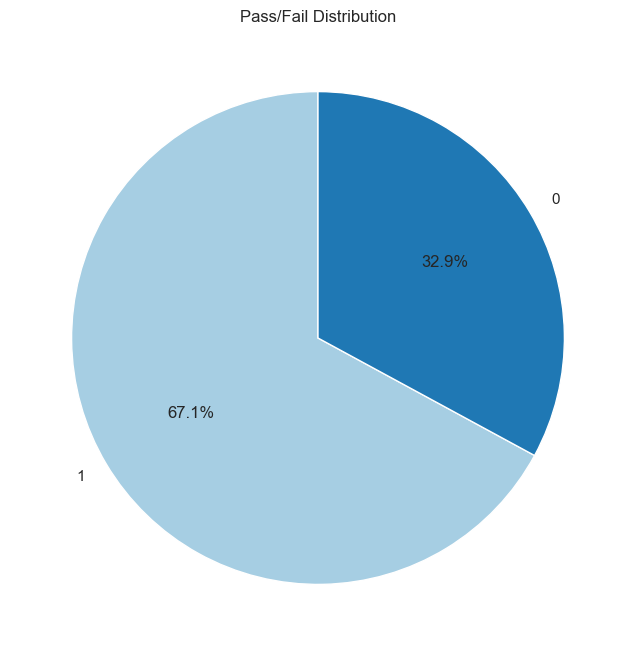

In [305]:
pass_counts = df['pass'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pass/Fail Distribution')
plt.show()


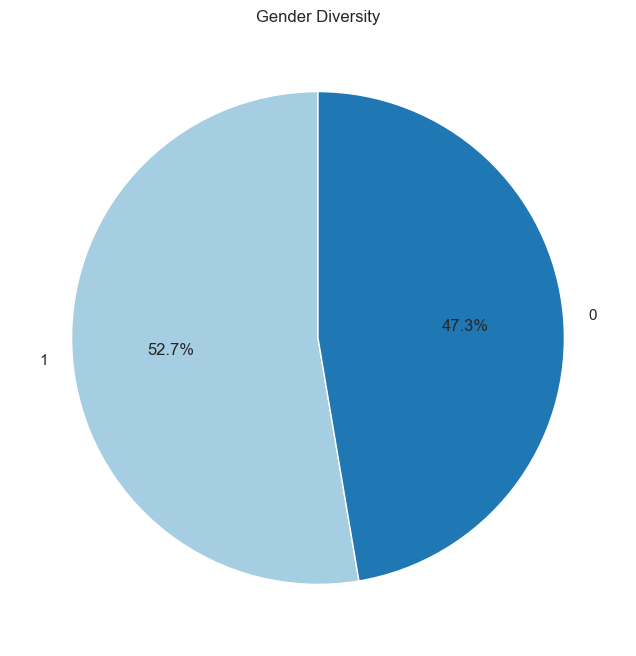

In [306]:
pass_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Gender Diversity')
plt.show()

# Model Training

In [307]:
x = df.drop(['pass'], axis = 1)
y = df['pass']

In [308]:
# Splitting data into traning and testing
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [309]:
from sklearn.svm import SVC
svm_model = SVC()

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")

SVM Model Accuracy: 94.94%


In [310]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' is for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.93
Recall: 1.00
F1-Score: 0.96


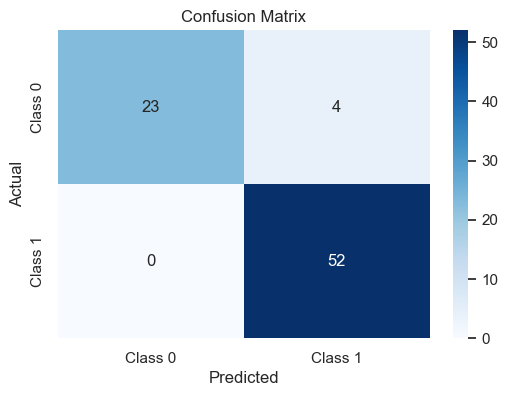

In [311]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()